In [1]:
import numpy as np

In [2]:
N = 10
mean = np.random.rand(N, 3)
_cov = np.array([[0.5, 0.2, -0.3], [0.2, 0.8, 0.2], [-0.3, 0.2, 0.8]])
cov = np.array([_cov for _ in range(N)])

In [3]:
for m, c in zip(mean, cov):
    print(m)
    print(c)
    break

[0.84140893 0.44635624 0.17261834]
[[ 0.5  0.2 -0.3]
 [ 0.2  0.8  0.2]
 [-0.3  0.2  0.8]]


In [4]:
def simple_mvr(mean, cov, size=1):
    samples = np.transpose([np.random.multivariate_normal(m, c, size=size)
                                         for m, c in zip(mean, cov)])
    return samples

In [5]:
def brutus_mvr(scale, av, rv, cov_sar, size=1):
    s_mc, a_mc, r_mc = np.array([mvn(np.array([s, a, r]), c,
                                         size=size)
                                         for s, a, r, c in zip(scale, av, rv,
                                                               cov_sar)], order='F').T
    return s_mc, a_mc, r_mc

In [135]:
brutus_samples = brutus_mvr(mean[:,0], mean[:,1], mean[:,2], cov, size=1000)

In [125]:
%%timeit
brutus_s_mc, brutus_a_mc, brutus_r_mc = brutus_mvr(mean[:,0], mean[:,1], mean[:,2], cov)

761 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Optimized Version

In [147]:
def opt_mvr(mean, cov, size=1, eps=0.000001):
    if len(np.shape(mean))==1:
        return np.random.multivariate_normal(mean, cov, size=size)
    
    N, d = np.shape(mean)
    K = cov + eps * np.full((N, d, d), np.identity(d))
    L = np.linalg.cholesky(K)
    
    u = np.random.normal(loc=0, scale=1, size=d*size*N).reshape(N, d, size)

    ans = np.repeat(mean[:, :, np.newaxis], size, axis=2) + np.matmul(L, u)
    
    ans = np.swapaxes(ans, 0, 1)
    ans = np.swapaxes(ans, 1, 2)
    return ans
    

In [ ]:
L has shape (N, d, d)
u has shape (N, d, size)


In [126]:
%%timeit
samples = opt_mvr(mean, cov, size=100)

105 µs ± 2.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [136]:
samples = opt_mvr(mean, cov, size=1000)

In [109]:
np.shape(samples)

(3, 10, 100000)

In [108]:
print(np.shape(brutus_samples))

(3, 10, 100000)


In [113]:
import matplotlib.pyplot as plt

In [137]:
x, y, z = samples

(-3, 3)

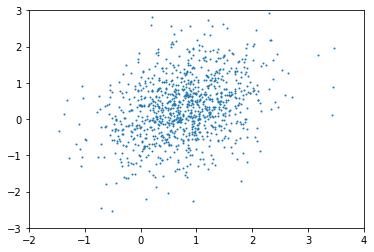

In [143]:
plt.scatter(x[:,0], y[:,0], s=1)
plt.xlim(-2, 4)
plt.ylim(-3, 3)

In [141]:
bx, by, bz = brutus_samples

(-3, 3)

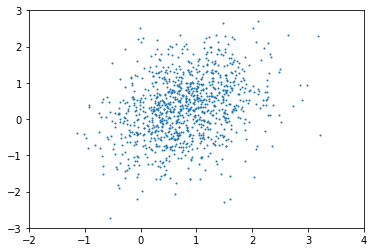

In [144]:
plt.scatter(bx[:,0], by[:,0], s=1)
plt.xlim(-2, 4)
plt.ylim(-3, 3)

In [149]:
opt_mvr([2, 3], [[2, 1], [1, 2]], 10)

array([[ 2.317769  ,  6.38221485],
       [-0.41056423,  1.54501298],
       [ 2.59486015,  4.51072699],
       [ 2.52295861,  2.55714509],
       [ 1.75130276,  1.061852  ],
       [ 1.19957365,  3.23472426],
       [ 3.82303102,  4.33425148],
       [-0.50572161,  1.36873903],
       [ 2.01457916,  1.97360024],
       [ 2.09738038,  1.20901746]])